In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [9]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2)
]

Count: 5159
Open profit: -123.49
Close profit: -207.64000000000004
Open ROI: -0.023936809459197517
Close ROI: -0.04024811009885638
UDI: 0.014127252303188705
AxesSubplot(0.125,0.125;0.775x0.755)


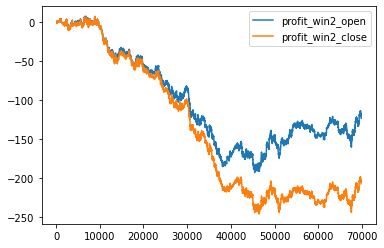

In [10]:
utils.print_away_win_result(segmented_df)

In [11]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.114175
expected_difference_loc,0.089179
simple_expected_difference,0.066688
simple_expected_difference_loc,0.047609
expected_total_loc,-0.016058
simple_expected_total_value_loc,-0.010552
simple_expected_total_value,-0.003578
expected_total,-0.001460


In [12]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.277976,-0.565220,0.287244
expected_difference,-0.255045,-0.508123,0.253078
simple_expected_difference_loc,-0.039181,-0.177892,0.138711
simple_expected_difference,-0.279178,-0.416121,0.136943
simple_expected_total_value,5.173679,5.269548,0.095869
expected_total_loc,2.585579,2.669600,0.084021
expected_total,2.545203,2.623914,0.078711
simple_expected_total_value_loc,5.118169,5.193503,0.075334


In [14]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.56) & (segmented_df['expected_difference'] <= -0.50)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win1')

,low,high,diff
expected_difference_loc,-1.116332,-1.028633,0.087699
expected_difference,-0.872643,-0.817100,0.055543


Count: 381
Open profit: 46.60999999999999
Close profit: 16.429999999999996
Open ROI: 0.12233595800524932
Close ROI: 0.043123359580052485
UDI: 0.06637223171664303
AxesSubplot(0.125,0.125;0.775x0.755)


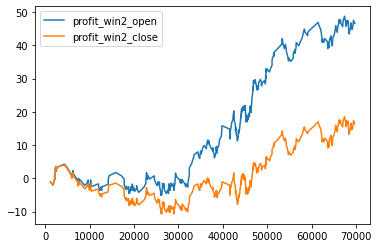

In [15]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -1.02) & (segmented_df['expected_difference'] <= -0.81)
]
utils.print_away_win_result(filtered_result_df)